In [ ]:
# Keras
import keras
from keras import regularizers, optimizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, MaxPool2D
from keras import layers
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.applications.imagenet_utils import preprocess_input

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd 

In [ ]:
df = pd.read_csv('data.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
temp = []

counter=0
for index,path in enumerate(df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=2.5, sr=44100, offset=0.5)
    sample_rate = np.array(sample_rate)
    
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=30)
    if mfccs.shape[1] < 216:
        b = np.zeros((30, 216 - mfccs.shape[1]))
        mfccs = np.concatenate((mfccs, b), axis=1)
    mfccs = np.expand_dims(mfccs, axis=0)
    temp.append(mfccs)   


In [ ]:
X = np.concatenate(temp, axis=0)

In [ ]:
filename = 'MfccData30'
outfile = open(filename,'wb')
pickle.dump(X,outfile)
outfile.close()

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/MfccData30'
outfile = open(filename,'rb')
X = pickle.load(outfile)
outfile.close()

In [ ]:
X.shape

(12162, 30, 216)

In [ ]:
def make_model_1(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_2(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_3(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_4(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_5(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_6(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_7(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_8(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_9(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_10(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)
    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_11(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_12(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_13(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_14(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_15(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_16(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_17(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def make_model_18(input_shape):
    
    nclass = 14
    
    inp = Input(input_shape)
    
    x = Convolution2D(32, (4,10), padding="same")(inp)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Convolution2D(32, (4,10), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D()(x)
    x = Dropout(rate=0.2)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
    x = Dropout(rate=0.2)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(rate=0.5)(x)
    
    out = Dense(nclass, activation='softmax')(x)

    
    ret_model = Model(inputs = inp, outputs=out)
    
    return ret_model

In [ ]:
def save_model(Model, model_name):
    save_dir = os.path.join(os.getcwd(), 'saved_models')

    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, model_name)
    Model.save(model_path)
    print('Save model and weights at %s ' % model_path)

    model_json = Model.to_json()
    with open("model_json.json", "w") as json_file:
        json_file.write(model_json)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X
                                                    , df.labels
                                                    , test_size=0.08
                                                    , shuffle=True
                                                    , random_state=42)

In [ ]:
print(f'X_train size = {X_train.shape}')
print(f'Y_train size = {Y_train.shape}')
print(f'X_test size = {X_test.shape}')
print(f'Y_test size = {Y_test.shape}')

X_train size = (11189, 30, 216)
Y_train size = (11189,)
X_test size = (973, 30, 216)
Y_test size = (973,)


In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
lb = LabelEncoder()
Y_train = np_utils.to_categorical(lb.fit_transform(Y_train))
Y_test = np_utils.to_categorical(lb.fit_transform(Y_test))
print(lb.classes_)

['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
print(f'Y_train size = {Y_train.shape}')
print(f'Y_test size = {Y_test.shape}')

Y_train size = (11189, 14)
Y_test size = (973, 14)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(f'X_train size = {X_train.shape}')
print(f'X_test size = {X_test.shape}')

X_train size = (11189, 30, 216, 1)
X_test size = (973, 30, 216, 1)


In [ ]:
# 4 layers with dropout, lr = 0.001

Model_1 = make_model_1((30, 216, 1))
opt = optimizers.Adam(0.001)
Model_1.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_1 = Model_1.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

Epoch 1/20
700/700 [==============================] - 305s 434ms/step - loss: 0.3602 - accuracy: 0.1734 - val_loss: 0.1825 - val_accuracy: 0.4296
Epoch 2/20
700/700 [==============================] - 300s 428ms/step - loss: 0.1813 - accuracy: 0.4323 - val_loss: 0.1454 - val_accuracy: 0.5252
Epoch 3/20
700/700 [==============================] - 301s 430ms/step - loss: 0.1582 - accuracy: 0.5076 - val_loss: 0.1438 - val_accuracy: 0.5560
Epoch 4/20
700/700 [==============================] - 298s 426ms/step - loss: 0.1471 - accuracy: 0.5410 - val_loss: 0.1342 - val_accuracy: 0.5714
Epoch 5/20
700/700 [==============================] - 302s 431ms/step - loss: 0.1402 - accuracy: 0.5621 - val_loss: 0.1281 - val_accuracy: 0.5910
Epoch 6/20
700/700 [==============================] - 298s 426ms/step - loss: 0.1374 - accuracy: 0.5706 - val_loss: 0.1228 - val_accuracy: 0.6043
Epoch 7/20
700/700 [==============================] - 299s 427ms/step - loss: 0.1284 - accuracy: 0.6081 - val_loss: 0.1210 -

In [ ]:
# 4 layers with dropout, lr = 0.01

_Model_1 = make_model_1((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model_1.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_1 = _Model_1.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

Epoch 1/20
700/700 [==============================] - 299s 426ms/step - loss: 0.2518 - accuracy: 0.2269 - val_loss: 0.1647 - val_accuracy: 0.4522
Epoch 2/20
700/700 [==============================] - 301s 430ms/step - loss: 0.1675 - accuracy: 0.4566 - val_loss: 0.1448 - val_accuracy: 0.5252
Epoch 3/20
700/700 [==============================] - 297s 424ms/step - loss: 0.1512 - accuracy: 0.5172 - val_loss: 0.1350 - val_accuracy: 0.5529
Epoch 4/20
700/700 [==============================] - 301s 430ms/step - loss: 0.1466 - accuracy: 0.5284 - val_loss: 0.1501 - val_accuracy: 0.5375
Epoch 5/20
700/700 [==============================] - 298s 426ms/step - loss: 0.1401 - accuracy: 0.5533 - val_loss: 0.1435 - val_accuracy: 0.5211
Epoch 6/20
700/700 [==============================] - 301s 430ms/step - loss: 0.1357 - accuracy: 0.5695 - val_loss: 0.1260 - val_accuracy: 0.5786
Epoch 7/20
700/700 [==============================] - 299s 428ms/step - loss: 0.1314 - accuracy: 0.5868 - val_loss: 0.1239 -

In [ ]:
# 4 layers without dropout, lr = 0.001

Model2 = make_model_2((30, 216, 1))
opt = optimizers.Adam(0.001)
Model2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_2 = Model2.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

Epoch 1/20
700/700 [==============================] - 292s 416ms/step - loss: 0.3448 - accuracy: 0.2257 - val_loss: 0.1709 - val_accuracy: 0.4430
Epoch 2/20
700/700 [==============================] - 295s 421ms/step - loss: 0.1639 - accuracy: 0.4857 - val_loss: 0.1496 - val_accuracy: 0.5324
Epoch 3/20
700/700 [==============================] - 290s 415ms/step - loss: 0.1464 - accuracy: 0.5409 - val_loss: 0.1310 - val_accuracy: 0.5848
Epoch 4/20
700/700 [==============================] - 294s 420ms/step - loss: 0.1299 - accuracy: 0.5982 - val_loss: 0.1334 - val_accuracy: 0.5540
Epoch 5/20
700/700 [==============================] - 289s 413ms/step - loss: 0.1246 - accuracy: 0.6125 - val_loss: 0.1364 - val_accuracy: 0.5385
Epoch 6/20
700/700 [==============================] - 294s 421ms/step - loss: 0.1175 - accuracy: 0.6418 - val_loss: 0.1306 - val_accuracy: 0.5797
Epoch 7/20
700/700 [==============================] - 291s 416ms/step - loss: 0.1134 - accuracy: 0.6603 - val_loss: 0.1311 -

In [ ]:
# 4 layers without dropout, lr = 0.01

_Model2 = make_model_2((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_2 = _Model2.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layers with dropout, lr = 0.001

Model3 = make_model_3((30, 216, 1))
opt = optimizers.Adam(0.001)
Model3.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_3 = Model3.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layers with dropout, lr = 0.01

_Model3 = make_model_3((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model3.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_3 = _Model3.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layers without dropout, lr = 0.001

Model4 = make_model_4((30, 216, 1))
opt = optimizers.Adam(0.001)
Model4.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_4 = Model4.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layers without dropout, lr = 0.01

_Model4 = make_model_4((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model4.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_4 = _Model4.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 2 layers with dropout, lr = 0.001

Model5 = make_model_5((30, 216, 1))
opt = optimizers.Adam(0.001)
Model5.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_5 = Model5.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test), verbose = 1)

In [ ]:
# 2 layers with dropout, lr = 0.01

_Model5 = make_model_5((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model5.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_5 = _Model5.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 2 layers without dropout, lr = 0.001

Model6 = make_model_6((30, 216, 1))
opt = optimizers.Adam(0.001)
Model6.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_6 = Model6.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 2 layers without dropout, lr = 0.01

_Model6 = make_model_6((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model6.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_6 = _Model6.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 1 layer with dropout, lr = 0.001

Model7 = make_model_7((30, 216, 1))
opt = optimizers.Adam(0.001)
Model7.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_7 = Model7.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 1 layer with dropout, lr = 0.01

_Model7 = make_model_7((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model7.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_7 = _Model7.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 1 layer without dropout, lr = 0.001

Model8 = make_model_8((30, 216, 1))
opt = optimizers.Adam(0.001)
Model8.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_8 = Model8.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 1 layer without dropout, lr = 0.01

_Model8 = make_model_8((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model8.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_8 = _Model8.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 4 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model9 = make_model_9((30, 216, 1))
opt = optimizers.Adam(0.001)
Model9.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_9 = Model9.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 4 layer with dropout, lr = 0.01, dropout 0.5 in the end

_Model9 = make_model_9((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model9.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_9 = _Model9.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 4 layer without dropout, lr = 0.001, dropout 0.5 in the end

Model10 = make_model_10((30, 216, 1))
opt = optimizers.Adam(0.001)
Model10.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_10 = Model10.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 4 layer without dropout, lr = 0.01, dropout 0.5 in the end

_Model10 = make_model_10((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model10.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_10 = _Model10.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model11 = make_model_11((30, 216, 1))
opt = optimizers.Adam(0.001)
Model11.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_11 = Model11.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layer with dropout, lr = 0.01, dropout 0.5 in the end

_Model11 = make_model_11((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model11.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_11 = _Model11.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layer without dropout, lr = 0.001, dropout 0.5 in the end

Model12 = make_model_12((30, 216, 1))
opt = optimizers.Adam(0.001)
Model12.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_12 = Model12.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 3 layer without dropout, lr = 0.01, dropout 0.5 in the end

_Model12 = make_model_12((30, 216, 1))
opt = optimizers.Adam(0.01)
_Model12.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

_model_history_12 = _Model12.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
plt.figure(figsize=(20,30))
plt.plot(model_history_9.history['accuracy'], color="red")
plt.plot(model_history_9_an.history['accuracy'], color="black")
plt.plot(model_history_10.history['accuracy'], color="blue")
plt.plot(model_history_10_an.history['accuracy'], color="green")
plt.plot(model_history_11.history['accuracy'], color="cyan")
plt.plot(model_history_11_an.history['accuracy'], color="magenta")
plt.plot(model_history_12.history['accuracy'], color="navy")
plt.plot(model_history_12_an.history['accuracy'], color="orange")
plt.plot(model_history_9.history['val_accuracy'], color="red", linestyle="dashed")
plt.plot(model_history_9_an.history['val_accuracy'], color="black", linestyle="dashed")
plt.plot(model_history_10.history['val_accuracy'], color="blue", linestyle="dashed")
plt.plot(model_history_10_an.history['val_accuracy'], color="green", linestyle="dashed")
plt.plot(model_history_11.history['val_accuracy'], color="cyan", linestyle="dashed")
plt.plot(model_history_11_an.history['val_accuracy'], color="magenta", linestyle="dashed")
plt.plot(model_history_12.history['val_accuracy'], color="navy", linestyle="dashed")
plt.plot(model_history_12_an.history['val_accuracy'], color="orange", linestyle="dashed")
plt.title('model accuracy train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['4 layer with dropout, lr = 0.001', 
            '4 layer with dropout, lr = 0.01', 
            '4 layer without dropout, lr = 0.001', 
            '4 layer without dropout, lr = 0.01', 
            '3 layer with dropout, lr = 0.001', 
            '3 layer with dropout, lr = 0.01', 
            '3 layer without dropout, lr = 0.001', 
            '3 layer without dropout, lr = 0.01'], loc='upper left')
plt.show()

In [ ]:
# 5 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model13 = make_model_13((30, 216, 1))
Model13
opt = optimizers.Adam(0.001)
Model13.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_13 = Model13.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 6 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model14 = make_model_14((30, 216, 1))
opt = optimizers.Adam(0.001)
Model14.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_14 = Model14.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 7 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model15 = make_model_15((30, 216, 1))
opt = optimizers.Adam(0.001)
Model15.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_15 = Model15.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
plt.figure(figsize=(20,30))
plt.plot(model_history_13.history['accuracy'], color="red")
plt.plot(model_history_14.history['accuracy'], color="black")
plt.plot(model_history_15.history['accuracy'], color="blue")
plt.plot(model_history_13.history['val_accuracy'], color="red", linestyle="dashed")
plt.plot(model_history_14.history['val_accuracy'], color="black", linestyle="dashed")
plt.plot(model_history_15.history['val_accuracy'], color="blue", linestyle="dashed")
plt.title('model accuracy train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['5 layer with dropout, lr = 0.001', 
            '6 layer with dropout, lr = 0.001', 
            '7 layer with dropout, lr = 0.001', ], loc='upper left')
plt.show()

In [ ]:
# 5 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model16 = make_model_16((30, 216, 1))
opt = optimizers.Adam(0.001)
Model16.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_16 = Model16.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 6 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model17 = make_model_17((30, 216, 1))
opt = optimizers.Adam(0.001)
Model17.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_17 = Model17.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 7 layer with dropout, lr = 0.001, dropout 0.5 in the end

Model18 = make_model_18((30, 216, 1))
opt = optimizers.Adam(0.001)
Model18.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_18 = Model18.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
# 4 layer with dropout, lr = 0.001, dropout 0.2 in the end

Model19 = make_model_1((30, 216, 1))
opt = optimizers.Adam(0.001)
Model19.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

model_history_19 = Model19.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

In [ ]:
plt.figure(figsize=(20,30))
plt.plot(model_history_16.history['accuracy'], color="red")
plt.plot(model_history_17.history['accuracy'], color="black")
plt.plot(model_history_18.history['accuracy'], color="blue")
plt.plot(model_history_19.history['accuracy'], color="green")
plt.plot(model_history_16.history['val_accuracy'], color="red", linestyle="dashed")
plt.plot(model_history_17.history['val_accuracy'], color="black", linestyle="dashed")
plt.plot(model_history_18.history['val_accuracy'], color="blue", linestyle="dashed")
plt.plot(model_history_19.history['val_accuracy'], color="green", linestyle="dashed")
plt.title('model accuracy train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['5 layer with dropout, lr = 0.001', 
            '6 layer with dropout, lr = 0.001', 
            '7 layer with dropout, lr = 0.001', 
            '4 layer with droupout, lr=0.001'], loc='upper left')
plt.show()

In [ ]:
Main_model_1 = make_model_1((30, 216, 1))
opt = optimizers.Adam(0.001)
Main_model_1.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

Main_model_history_1 = Main_model_1.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

print("4 layer with dropout, lr = 0.001, dropout 0.2 in the end")

Epoch 1/20
700/700 [==============================] - 301s 428ms/step - loss: 0.3509 - accuracy: 0.1890 - val_loss: 0.1906 - val_accuracy: 0.4214
Epoch 2/20
700/700 [==============================] - 294s 420ms/step - loss: 0.1816 - accuracy: 0.4292 - val_loss: 0.1965 - val_accuracy: 0.3947
Epoch 3/20
700/700 [==============================] - 299s 427ms/step - loss: 0.1560 - accuracy: 0.5115 - val_loss: 0.1662 - val_accuracy: 0.4902
Epoch 4/20
700/700 [==============================] - 296s 423ms/step - loss: 0.1455 - accuracy: 0.5479 - val_loss: 0.1369 - val_accuracy: 0.5612
Epoch 5/20
700/700 [==============================] - 302s 431ms/step - loss: 0.1402 - accuracy: 0.5587 - val_loss: 0.1330 - val_accuracy: 0.5612
Epoch 6/20
700/700 [==============================] - 300s 428ms/step - loss: 0.1350 - accuracy: 0.5732 - val_loss: 0.1250 - val_accuracy: 0.5868
Epoch 7/20
700/700 [==============================] - 297s 424ms/step - loss: 0.1304 - accuracy: 0.5948 - val_loss: 0.1245 -

In [ ]:
Main_model_2 = make_model_16((30, 216, 1))
opt = optimizers.Adam(0.001)
Main_model_2.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

Main_model_history_2 = Main_model_2.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

print("5 layer with dropout, lr = 0.001, dropout 0.5 in the end")

Epoch 1/20
700/700 [==============================] - 893s 1s/step - loss: 0.3662 - accuracy: 0.1444 - val_loss: 0.2056 - val_accuracy: 0.3535
Epoch 2/20
700/700 [==============================] - 884s 1s/step - loss: 0.2091 - accuracy: 0.3406 - val_loss: 0.1630 - val_accuracy: 0.4584
Epoch 3/20
700/700 [==============================] - 874s 1s/step - loss: 0.1778 - accuracy: 0.4424 - val_loss: 0.1579 - val_accuracy: 0.4892
Epoch 4/20
700/700 [==============================] - 864s 1s/step - loss: 0.1658 - accuracy: 0.4833 - val_loss: 0.1462 - val_accuracy: 0.5313
Epoch 5/20
700/700 [==============================] - 863s 1s/step - loss: 0.1572 - accuracy: 0.5104 - val_loss: 0.1343 - val_accuracy: 0.5591
Epoch 6/20
700/700 [==============================] - 859s 1s/step - loss: 0.1517 - accuracy: 0.5268 - val_loss: 0.1306 - val_accuracy: 0.5735
Epoch 7/20
700/700 [==============================] - 877s 1s/step - loss: 0.1461 - accuracy: 0.5429 - val_loss: 0.1256 - val_accuracy: 0.5899

In [ ]:
Main_model_3 = make_model_18((30, 216, 1))
opt = optimizers.Adam(0.001)
Main_model_3.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ["accuracy"])

Main_model_history_3 = Main_model_3.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16, validation_data=(X_test, Y_test))

print("7 layer with dropout, lr = 0.001, dropout 0.5 in the end")

Epoch 1/20
700/700 [==============================] - 2236s 3s/step - loss: 0.4111 - accuracy: 0.1218 - val_loss: 0.2084 - val_accuracy: 0.3422
Epoch 2/20
700/700 [==============================] - 2234s 3s/step - loss: 0.2201 - accuracy: 0.2988 - val_loss: 0.1732 - val_accuracy: 0.4286
Epoch 3/20
700/700 [==============================] - 2241s 3s/step - loss: 0.1851 - accuracy: 0.4254 - val_loss: 0.1557 - val_accuracy: 0.4645
Epoch 4/20
700/700 [==============================] - 2231s 3s/step - loss: 0.1680 - accuracy: 0.4707 - val_loss: 0.1499 - val_accuracy: 0.4892
Epoch 5/20
700/700 [==============================] - 2228s 3s/step - loss: 0.1616 - accuracy: 0.4963 - val_loss: 0.1613 - val_accuracy: 0.4594
Epoch 6/20
700/700 [==============================] - 2239s 3s/step - loss: 0.1544 - accuracy: 0.5132 - val_loss: 0.1444 - val_accuracy: 0.5303
Epoch 7/20
700/700 [==============================] - 2237s 3s/step - loss: 0.1524 - accuracy: 0.5237 - val_loss: 0.1307 - val_accuracy:

In [ ]:
plt.figure(figsize=(20,30))
plt.plot(Main_model_history_1.history['accuracy'], color="red")
plt.plot(Main_model_history_2.history['accuracy'], color="black")
plt.plot(Main_model_history_3.history['accuracy'], color="green")
plt.plot(Main_model_history_1.history['val_accuracy'], color="red", linestyle="dashed")
plt.plot(Main_model_history_2.history['val_accuracy'], color="black", linestyle="dashed")
plt.plot(Main_model_history_3.history['val_accuracy'], color="green", linestyle="dashed")
plt.title('model accuracy train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['4 layer with dropout, lr = 0.001', 
            '5 layer with dropout, lr = 0.001',
            '7 layer with dropout, lr = 0.001',], loc='upper left')
plt.show()

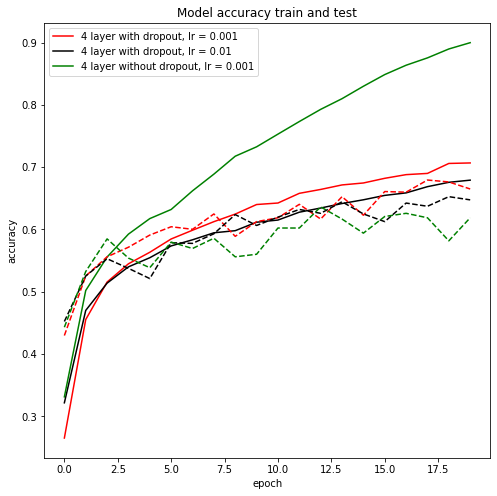

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history_1.history['accuracy'], 
         color="red")
plt.plot(_model_history_1.history['accuracy'], 
         color="black")
plt.plot(model_history_2.history['accuracy'], 
         color="green")
plt.plot(model_history_1.history['val_accuracy'], 
         color="red", 
         linestyle="dashed")
plt.plot(_model_history_1.history['val_accuracy'], 
         color="black", 
         linestyle="dashed")
plt.plot(model_history_2.history['val_accuracy'], 
         color="green", 
         linestyle="dashed")
plt.title('Model accuracy train and test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['4 layer with dropout, lr = 0.001', 
            '4 layer with dropout, lr = 0.01',
            '4 layer without dropout, lr = 0.001',], loc='upper left')
plt.savefig("comparison_1")
plt.show()

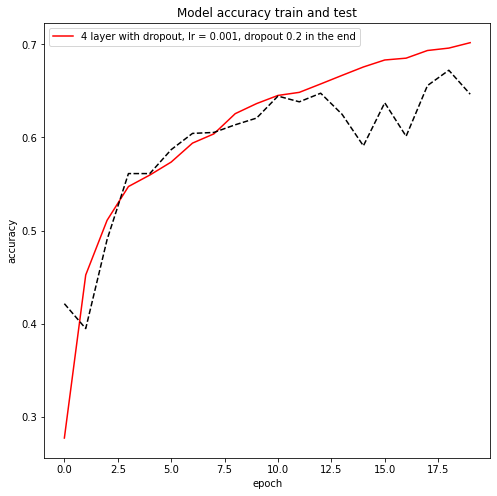

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(Main_model_history_1.history['accuracy'], 
         color="red")
plt.plot(Main_model_history_1.history['val_accuracy'], 
         color="black", 
         linestyle="dashed")
plt.title('Model accuracy train and test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['4 layer with dropout, lr = 0.001, dropout 0.2 in the end',], loc='upper left')
plt.savefig("Main_model_1")
plt.show()

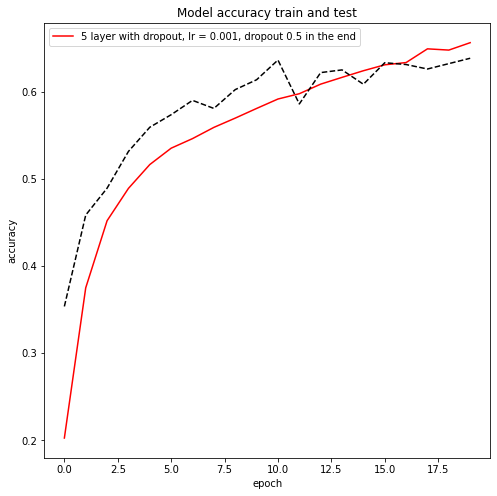

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(Main_model_history_2.history['accuracy'], 
         color="red")
plt.plot(Main_model_history_2.history['val_accuracy'], 
         color="black", 
         linestyle="dashed")
plt.title('Model accuracy train and test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['5 layer with dropout, lr = 0.001, dropout 0.5 in the end',], loc='upper left')
plt.savefig("Main_model_2")
plt.show()

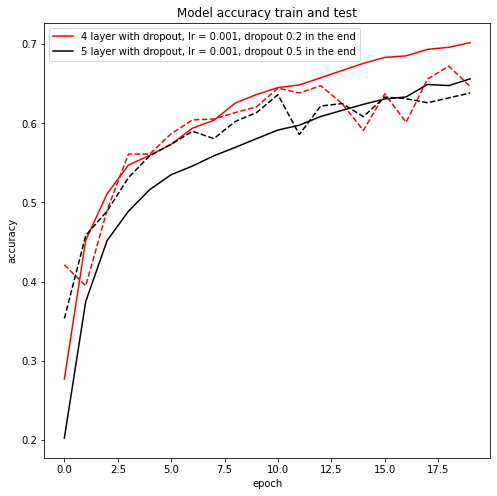

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(Main_model_history_1.history['accuracy'], 
         color="red")
plt.plot(Main_model_history_2.history['accuracy'], 
         color="black")
plt.plot(Main_model_history_1.history['val_accuracy'], 
         color="red", 
         linestyle="dashed")
plt.plot(Main_model_history_2.history['val_accuracy'], 
         color="black", 
         linestyle="dashed")
plt.title('Model accuracy train and test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['4 layer with dropout, lr = 0.001, dropout 0.2 in the end', 
            '5 layer with dropout, lr = 0.001, dropout 0.5 in the end',], loc='upper left')
plt.savefig("comparison_2")
plt.show()